d:\aqi-predictor\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-01-26 01:40:51,624 INFO: Initializing external client
2026-01-26 01:40:51,625 INFO: Base URL: https://c.app.hopsworks.ai:443
2026-01-26 01:40:54,017 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1333405
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.40s) 


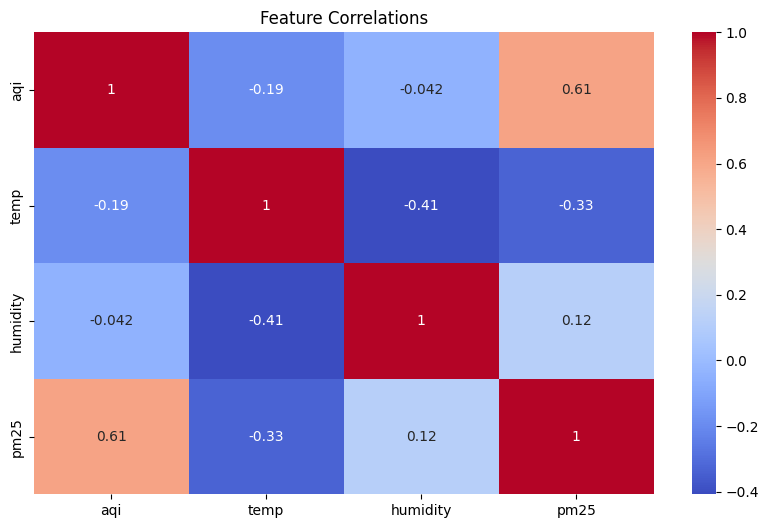

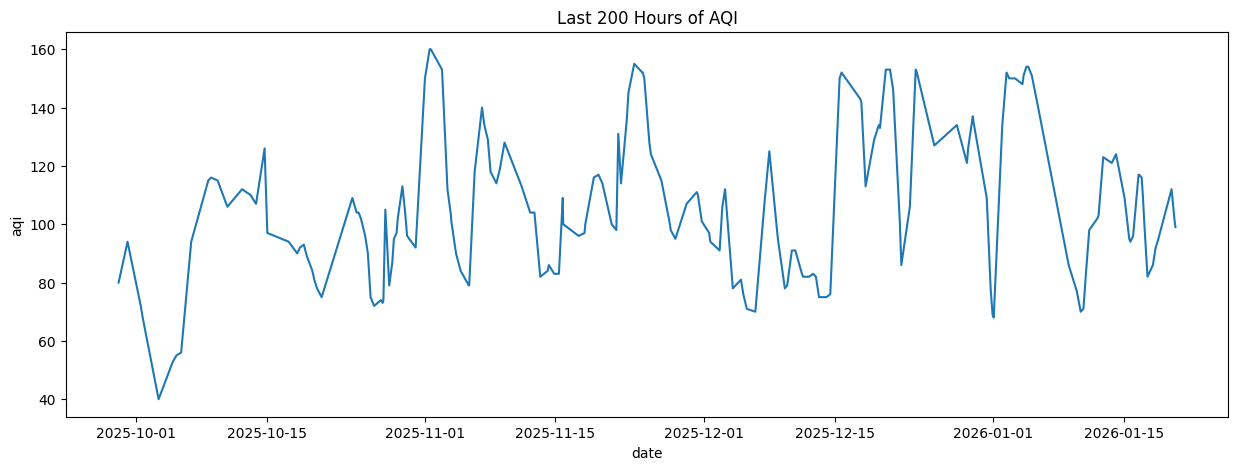

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hopsworks
import os
from dotenv import load_dotenv

# 1. Connect
load_dotenv()
project = hopsworks.login(api_key_value=os.getenv("HOPSWORKS_API_KEY"))
fs = project.get_feature_store()

# 2. Get Data
fg = fs.get_feature_group(name="aqi_features_hourly", version=1)
df = fg.read()

# 3. Simple EDA (Correlation Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(df[['aqi', 'temp', 'humidity', 'pm25']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# 4. Hourly Trend Line
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
plt.figure(figsize=(15,5))
sns.lineplot(data=df.tail(200), x='date', y='aqi')
plt.title("Last 200 Hours of AQI")
plt.show()